In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
df_clean = pd.read_csv('cars.csv')

In [3]:
df = df_clean.copy()

In [4]:
df.head()

id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
1          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
2          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
3          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
4          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   

  image_url description county state lat long posting_date  
0       NaN         NaN    NaN    az NaN  NaN          NaN  
1       NaN         NaN    NaN    ar NaN  NaN          NaN  
2       NaN         NaN    NaN    fl NaN  NaN          NaN  
3       NaN         NaN    NaN    ma NaN  NaN          NaN  
4       NaN         NaN    NaN    nc NaN  NaN          NaN  

[5 rows x 26 columns]

In [5]:
df.shape

(426880, 26)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(426880, 26)

In [8]:
df.nunique()

id              426880
url             426880
region             404
region_url         413
price            15655
year               114
manufacturer        42
model            29667
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118264
drive                3
size                 4
type                13
paint_color         12
image_url       241899
description     360911
county               0
state               51
lat              53181
long             53772
posting_date    381536
dtype: int64

In [9]:
#Öncelikle model için önemli olmayan sütunları df den çıkarıcaz.

In [10]:
drop_columns = {"id","url","region","region_url","VIN","image_url","description","lat","long","posting_date","county","state","model","size","paint_color"}

df.drop(columns=drop_columns,axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   condition     252776 non-null  object 
 4   cylinders     249202 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   title_status  418638 non-null  object 
 8   transmission  424324 non-null  object 
 9   drive         296313 non-null  object 
 10  type          334022 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 35.8+ MB


In [12]:
for col in df.columns:
    print(f"kolon ismi :{col} -- uniuqe veri sayısı:{df[col].nunique()}\n uniuqe verileri: {df[col].unique()}\n**********************************************")

kolon ismi :price -- uniuqe veri sayısı:15655
 uniuqe verileri: [ 6000 11900 21000 ...  6328 19853 17873]
**********************************************
kolon ismi :year -- uniuqe veri sayısı:114
 uniuqe verileri: [  nan 2014. 2010. 2020. 2017. 2013. 2012. 2016. 2019. 2011. 1992. 2018.
 2004. 2015. 2001. 2006. 1968. 2003. 2008. 2007. 2005. 1966. 2009. 1998.
 2002. 1999. 2021. 1997. 1976. 1969. 1995. 1978. 1954. 1979. 1970. 1974.
 1996. 1987. 2000. 1955. 1960. 1991. 1972. 1988. 1994. 1929. 1984. 1986.
 1989. 1973. 1946. 1933. 1958. 1937. 1985. 1957. 1953. 1942. 1963. 1977.
 1993. 1903. 1990. 1965. 1982. 1948. 1983. 1936. 1932. 1951. 1931. 1980.
 1967. 1971. 1947. 1981. 1926. 1962. 1975. 1964. 1934. 1952. 1940. 1959.
 1950. 1930. 1956. 1922. 1928. 2022. 1901. 1941. 1924. 1927. 1939. 1923.
 1949. 1961. 1935. 1918. 1900. 1938. 1913. 1916. 1943. 1925. 1921. 1915.
 1945. 1902. 1905. 1920. 1944. 1910. 1909.]
**********************************************
kolon ismi :manufacturer -- uniuqe ver

In [13]:
#Artık df de gereksiz sütun yok şimdi var olan sütunlardaki NaN değerler ile uğraşıcaz.

=== NULL DEĞER ANALİZİ ===

price                0
year              1205
manufacturer     17646
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
type             92858
dtype: int64

=== NULL DEĞER YÜZDELERİ ===

price            0.000000
year             0.282281
manufacturer     4.133714
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
drive           30.586347
type            21.752717
dtype: float64


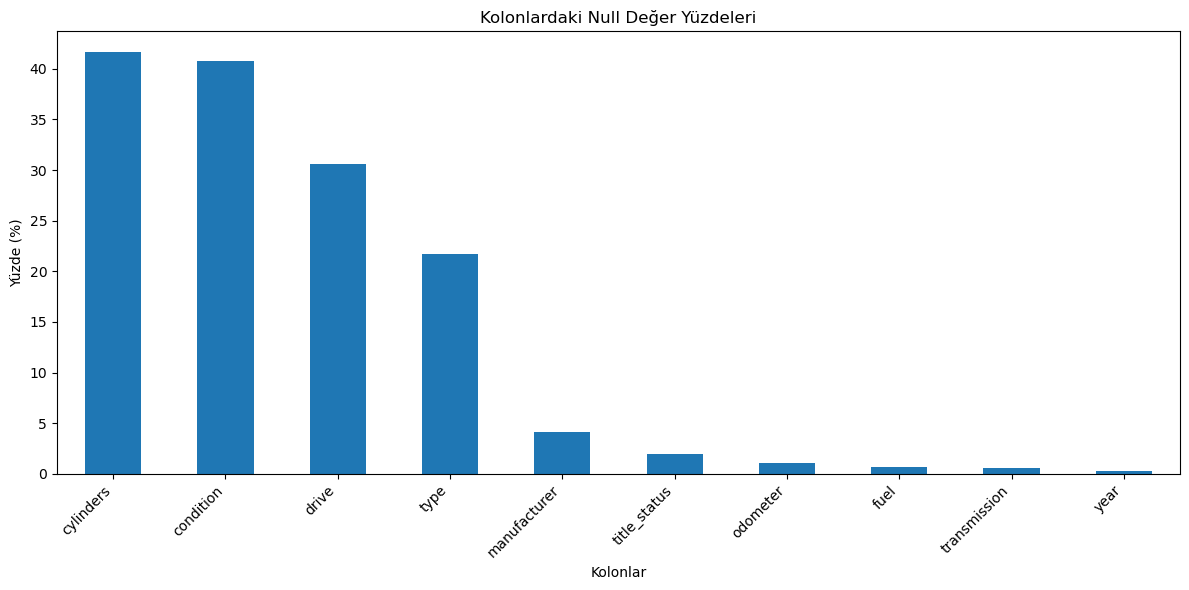


=== Satır Bazında Null Sayıları ===
0     128501
1     130084
2      79135
3      39858
4      44569
5       3884
6         89
7        129
8        539
9         24
10        68
Name: count, dtype: int64


In [14]:
print("=== NULL DEĞER ANALİZİ ===\n")
print(df.isnull().sum())
print("\n=== NULL DEĞER YÜZDELERİ ===\n")
print((df.isnull().sum() / len(df)) * 100)


plt.figure(figsize=(12, 6))
null_percent = (df.isnull().sum() / len(df)) * 100
null_percent = null_percent[null_percent > 0].sort_values(ascending=False)
null_percent.plot(kind='bar')
plt.title('Kolonlardaki Null Değer Yüzdeleri')
plt.ylabel('Yüzde (%)')
plt.xlabel('Kolonlar')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n=== Satır Bazında Null Sayıları ===")
print(df.isnull().sum(axis=1).value_counts().sort_index())

In [15]:
df["year"] = df.groupby("manufacturer",dropna=False)["year"].transform(
    lambda x: x.fillna(x.median())
)

In [16]:
df.dropna(subset=["manufacturer"],inplace=True)

In [17]:
df["condition"].fillna("unknown",inplace=True)

In [18]:
groupbyColumns = ["cylinders","fuel","transmission","drive"]

for column in groupbyColumns:
    df[column] = df.groupby(["manufacturer","type"],dropna=False)[column].transform(
    lambda x:x.fillna(x.mode()[0]) if not x.mode().empty else x
 )
    df.dropna(subset=[column],inplace=True)

In [19]:
df["odometer"] = df.groupby(["manufacturer","type"],dropna=False)["odometer"].transform(
    lambda x: x.fillna(x.median()) if x.notna().any() else x
)

df.dropna(subset=["odometer"],inplace=True)

In [20]:
df["title_status"].fillna(df["title_status"].mode()[0], inplace=True)

In [21]:
def fill_type_from_model_column(df, df_with_model):
    """
    df_with_model'deki model kolonunu kullanarak df'in type kolonunu doldur
    
    Parameters:
    -----------
    df : DataFrame
        Type'ı doldurulacak DataFrame (model kolonu yok)
    df_with_model : DataFrame
        Model kolonuna sahip DataFrame
        
    Returns:
    --------
    df : DataFrame with filled 'type' column
    """
    print("=== TYPE DOLDURMA (MODEL BİLGİSİ İLE) ===\n")
    
    # Model bilgisini geçici ekle
    if len(df) == len(df_with_model):
        df['model_temp'] = df_with_model['model'].values
    else:
        # Index bazlı merge
        df = df.merge(
            df_with_model[['model']], 
            left_index=True, 
            right_index=True, 
            how='left',
            suffixes=('', '_temp')
        )
        if 'model_temp' not in df.columns:
            df.rename(columns={'model': 'model_temp'}, inplace=True)
    
    print(f"Başlangıç type null: {df['type'].isnull().sum()}")
    
    # Extraction fonksiyonu
    def extract_type(row):
        if pd.notna(row['type']):
            return row['type']
        
        if pd.isna(row['model_temp']):
            return None
        
        model = str(row['model_temp']).lower()
        
        # Comprehensive keywords
        type_keywords = {
            'pickup': ['f-150', 'f-250', 'f-350', 'silverado', 'sierra', 'ram', 
                      'tundra', 'tacoma', 'ranger', 'colorado', 'frontier', 'titan'],
            'SUV': ['4runner', 'explorer', 'tahoe', 'suburban', 'highlander', 
                    'pilot', 'pathfinder', 'expedition', 'durango', 'traverse',
                    'cr-v', 'rav4', 'rogue', 'equinox', 'escape'],
            'sedan': ['camry', 'accord', 'civic', 'corolla', 'altima', 'sentra',
                     'malibu', 'fusion', 'impala', 'optima', 'sonata', 'elantra'],
            'coupe': ['mustang', 'camaro', 'corvette', 'challenger', 'charger',
                     '370z', '350z', 'miata', 'brz', 'gt-r'],
            'van': ['odyssey', 'sienna', 'pacifica', 'caravan', 'quest', 'town'],
            'hatchback': ['golf', 'focus', 'fiesta', 'fit', 'yaris', 'prius']
        }
        
        for vehicle_type, keywords in type_keywords.items():
            if any(keyword in model for keyword in keywords):
                return vehicle_type
        
        return None
    
    # Apply
    print("1️⃣ Model isminden type çıkarılıyor...")
    df['type'] = df.apply(extract_type, axis=1)
    print(f"   Sonrası null: {df['type'].isnull().sum()}")
    
    # Manufacturer bazlı mode
    print("2️⃣ Manufacturer bazlı mode...")
    df['type'] = df.groupby('manufacturer')['type'].transform(
        lambda x: x.fillna(x.mode()[0]) if not x.mode().empty and len(x.dropna()) > 0 else x
    )
    print(f"   Sonrası null: {df['type'].isnull().sum()}")
    
    # Unknown
    print("3️⃣ Kalan null'lar 'unknown' yapılıyor...")
    df['type'].fillna('unknown', inplace=True)
    print(f"   Final null: {df['type'].isnull().sum()}")
    
    # Temizlik
    df = df.drop('model_temp', axis=1)
    
    print("\n✅ Type doldurma tamamlandı!")
    print("\nType dağılımı:")
    print(df['type'].value_counts())
    
    return df

# Kullanım
df = fill_type_from_model_column(df, df_clean)

=== TYPE DOLDURMA (MODEL BİLGİSİ İLE) ===

Başlangıç type null: 86370
1️⃣ Model isminden type çıkarılıyor...
   Sonrası null: 50063
2️⃣ Manufacturer bazlı mode...
   Sonrası null: 0
3️⃣ Kalan null'lar 'unknown' yapılıyor...
   Final null: 0

✅ Type doldurma tamamlandı!

Type dağılımı:
type
sedan          117709
SUV             90340
pickup          74028
truck           33492
other           21294
coupe           20649
hatchback       17236
van             10720
wagon           10545
convertible      7152
mini-van         4682
offroad           571
bus               314
Name: count, dtype: int64


In [22]:
df.isna().sum()

price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
dtype: int64